## Tic-Tac-Toe Agent

#### Importing libraries

In [1]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

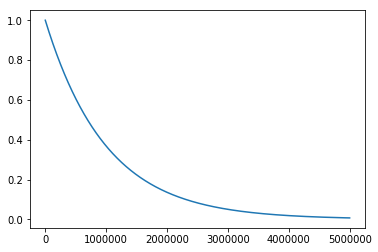

In [2]:
# Epsilon Decay Rate
epsilons = []
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
for i in range(0,5000000):
    epsilons.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))
plt.plot(time, epsilons)
plt.show()        

In [3]:
class Qlearning:
    # Set hyper parameters
    def __init__(self, epsilon=0.5, alpha=0.01, gamma=0.9, values=[]):
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.values = values
        self.options = []
        self.deltas = []
        self.biggest_change = 0

    # Begin/Reset game 
    def begin_game(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.options = self.values.copy()

    # esplion greedy stratergy
    def epslion_greedy(self, iteration, state, possible_moves): #esplion greedy algorithm
        #return  action
        self.last_board = tuple(state)
        
        # Check with epsilon_decay
        if(random.random() < epsilons[iteration]):
            move = random.choice(possible_moves) ##action
            self.state_action_last=(self.last_board,move)
            self.q_last=self.get_Q(self.last_board,move)
            return move
        else: #greedy strategy
            Q_list=[]
            for action in possible_moves:
                Q_list.append(self.get_Q(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # If more than 1 moves are identified, select randomly
                all_possible_moves = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(all_possible_moves)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.get_Q(self.last_board, possible_moves[i])
            return possible_moves[i]

    
    def get_Q(self, state, action): #get Q states
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))

    def update_Q(self, reward, state, possible_moves): # update Q states using Qlearning
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.get_Q(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)
        self.biggest_change = max(self.biggest_change, np.abs(self.Q[self.state_action_last] - self.q_last))

    def save_Q(self,file_name):  #save Q state
        with open(file_name +'.pkl', 'wb') as handle:
            pickle.dump(self.Q, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(self.Q.keys())) 

    def load_Q(self,file_name): # load Q state
        with open(file_name + '.pkl', 'rb') as handle:
            self.Q = pickle.load(handle)
    

In [4]:
# Train
game = TicTacToe() #game instance
learning_agent_player =  Qlearning(values=[1,3,5,7,9]) #player1 is learning agent
environment_player =  Qlearning(values=[2,4,6,8]) #player2 is environment
game.start_training(learning_agent_player,environment_player, 5000000, verbose=False) #train for 50,00,000 iterations
game.save_states()  #save Q states

Training Started
Training Completed
9588825
5629939


In [5]:
# Get Q values for RL Agent and Environment
rl_Q, env_Q = game.get_Q()

In [6]:
len(rl_Q)

9588825

In [7]:
# Q-values for Learning Agent
rl_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 9): -1.5760450306364076,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 1): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 2): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 3): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 4): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 5): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 6): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 7): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 7), 8): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 4, 7), 7): -3.0925040207970156,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 1): 1.0,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 2): 1.0,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 3): 1.0,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 4): 1.0,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 5): 1.0,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 6): 1.0,
 ((0, 0, 0, 0, 0, 2, 1, 4, 7), 2): -0.3714085334895337,
 ((0, 9, 0, 0, 0, 2, 1, 4, 7), 1): 1.0,
 ((0, 9, 0, 0, 0, 2, 1, 4, 7), 3): 1.0,
 ((0, 9, 0, 0, 0, 2, 1, 4, 7), 4): 1.0,
 ((0, 9, 0, 0, 0, 2, 1, 4, 7), 5): 1.0,
 ((0, 9, 8, 0, 0, 2, 1, 4, 7), 5): 0.989,
 ((0, 9, 8, 0, 3, 2, 1, 4, 7), 1): 1.0,
 ((0, 9, 8, 0, 3, 2, 1, 4, 7),

In [8]:
len(env_Q)

5629939

In [9]:
# Q-values for Environment
env_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 7), 8): 5.464805036657685,
 ((0, 0, 0, 0, 0, 0, 1, 4, 7), 6): 5.298941569329789,
 ((0, 9, 0, 0, 0, 2, 1, 4, 7), 3): 1.0,
 ((0, 9, 8, 0, 3, 2, 1, 4, 7), 1): 0.99,
 ((0, 0, 0, 0, 0, 0, 0, 5, 0), 4): -9.099999888498392,
 ((0, 0, 1, 2, 0, 0, 0, 5, 0), 2): 1.0,
 ((0, 8, 1, 2, 0, 0, 9, 5, 0), 6): 0.899,
 ((0, 8, 1, 2, 0, 4, 9, 5, 7), 5): 0.99,
 ((0, 0, 0, 0, 0, 0, 0, 9, 0), 5): 5.705385699869776,
 ((0, 1, 0, 0, 2, 0, 0, 9, 0), 7): 5.280808417169922,
 ((0, 1, 0, 0, 2, 0, 4, 9, 7), 6): 1.0,
 ((3, 1, 0, 0, 2, 6, 4, 9, 7), 3): 0.99,
 ((0, 0, 0, 0, 0, 0, 0, 3, 0), 9): -9.099999831640293,
 ((7, 0, 0, 0, 0, 0, 0, 3, 6), 4): 1.192099501,
 ((7, 0, 0, 2, 0, 0, 1, 3, 6), 6): 1.0,
 ((7, 0, 5, 2, 0, 8, 1, 3, 6), 2): 0.89,
 ((7, 0, 0, 0, 0, 0, 0, 0, 0), 3): 5.592467786247059,
 ((7, 0, 2, 0, 1, 0, 0, 0, 0), 8): 1.0,
 ((7, 0, 2, 0, 1, 0, 3, 6, 0), 2): 0.899,
 ((7, 4, 2, 5, 1, 0, 3, 6, 0), 6): 1.0,
 ((7, 4, 2, 5, 1, 0, 3, 6, 0), 9): 1.0,
 ((0, 0, 0, 0, 0, 7, 0, 0, 0), 9): 5.8687665

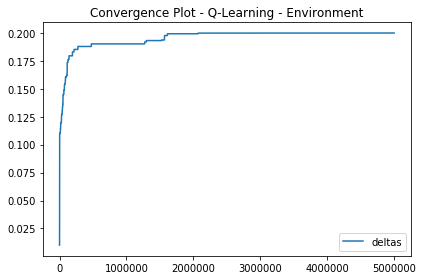

In [10]:
# Convergence Plot - Q-Learning - Environment
plt.plot(environment_player.deltas, label="deltas")
plt.legend()
plt.title("Convergence Plot - Q-Learning - Environment")
plt.tight_layout()

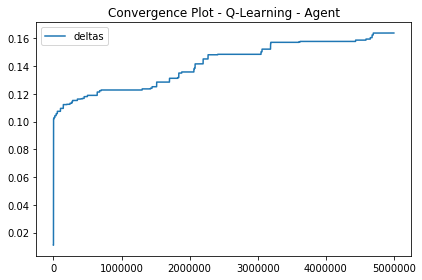

In [11]:
# Convergence Plot - Q-Learning - Learning Agent
plt.plot(learning_agent_player.deltas, label="deltas")
plt.legend()
plt.title("Convergence Plot - Q-Learning - Agent")
plt.tight_layout()